# ABA: Quiz1 Solutions

### Spring 2023

In [1]:
# Import required libraries :
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# 1. Hazard? [12]

### Explain in your own words – what does hazard rate mean? [2]

A: Probability or failure of an object at time t, given the object has survived till time t-1

Suppose the hazard rate function for the “Telang timing process” is given by:
$$h(t) = (60-15t + t^2)/500.$$

For this timing process:  

(For the plots, use t=1, 2, 3, …, 39, 40.)

### a.	Plot the hazard rate. [2]

In [2]:
#define the telang timing process
def hazard_function(t):
    return (60-15*t+t**2)/500

time_t = range(0,40)
hazard_rate = [hazard_function(t) for t in time_t]

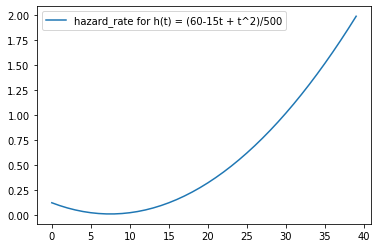

In [3]:
sns.lineplot(x=time_t,y=hazard_rate,label='hazard_rate for h(t) = (60-15t + t^2)/500')

### b.	Derive and plot the survival function - S(t). [4]

We know that:

$$ S(t) = {1-F(t)} $$

$$ F(t) = 1 - \exp\left({-\int{h(t)dt}}\right)$$

$$ S(t) = \exp\left({-\int{h(t)dt}}\right) $$

Then:
$$ S(t) = \exp\left({-\int_0^t{h(t)dt}}\right) $$
$$ = \exp\left({-\frac{60 t - (15 t^2)/2 + t^3/3}{500}}\right) $$

In [4]:
import math
#define survival function
def surv_function(t):
    return np.exp((-60*t+(15*t**2)/2 - t**3/3)/500)

def surv_function2(t):
    return math.exp(-t*((2*t**2) - (45*t) + 360)/3000)

time_t = range(1,41)
surv_rate = [surv_function2(t) for t in time_t]

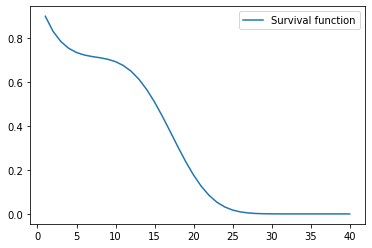

In [5]:
sns.lineplot(x=time_t,y=surv_rate,label='Survival function')
plt.show()

### c.	Derive and plot the probability distribution function, i.e., f(t). [4]

We know that:
$$ F(t) = {1 - S(t)} $$
$$ f(t) = F'(t) $$

Then:
$$F(t) = 1 - S(t)$$
$$F(t) = 1 - \exp\left({-\frac{60 t - (15 t^2)/2 + t^3/3}{500}}\right) $$
$$F'(t) = \frac{1}{500}\exp\left({-\frac{60 t - (15 t^2)/2 + t^3/3}{500}}\right) (60 - 15 t + t^2) = f(t) $$


In [6]:
#define survival function
def probdist_function(t):
    return 1/500*np.exp((-60*t+(15*t**2)/2 - t**3/3)/500)*(60-15*t+t**2)

time_t = range(0,40)
density_f = [probdist_function(t) for t in time_t]

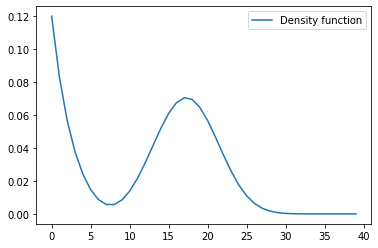

In [7]:
sns.lineplot(x=time_t,y=density_f,label='Density function')
plt.show()

# 2. Briefly explain the relationship between hazard function and distribution function? [5]

The hazard function, denoted as \( h(t) \), defines the instantaneous rate at which events occur, given no prior occurrence. The probability density function (PDF), $ f(t)$, describes the likelihood of the event occurring at a specific time \( t \), whereas the cumulative distribution function (CDF), $ F(t) $, represents the probability of the event happening at or before time $ t $.

The relationship between the hazard function and the CDF is characterized by the formula:

$$F(t) = 1 - \exp\left(-\int_{0}^{t} h(u) \, du\right)$$

By knowing $h(t)$, one can determine $F(t)$, and vice versa, signifying a one-to-one correspondence between the hazard function and the distribution of the time-to-event variable.


# If you have 1200 units and you observe their failure as shown below? Calculate hazard rate and provide details of your calculation. [13]

In [8]:
data = {
    'time': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'failures': [0, 95, 134, 203, 250, 135, 85, 70, 40]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)
df

,time,failures
0,0,0
1,1,95
2,2,134
3,3,203
4,4,250
5,5,135
6,6,85
7,7,70
8,8,40


In [9]:
# Starting number of units
initial_units = 1200

# Initialize 'at_risk' at time 0
df.loc[0, 'at_risk'] = initial_units - df.loc[0, 'failures']

# Calculate 'at_risk' for subsequent times
for i in range(1, len(df)):
    df.loc[i, 'at_risk'] = df.loc[i-1, 'at_risk'] - df.loc[i-1, 'failures']

# Calculate the empirical hazard rate
df['hazard'] = df['failures'] / df['at_risk']


In [10]:
df

,time,failures,at_risk,hazard
0,0,0,1200.0,0.000000
1,1,95,1200.0,0.079167
2,2,134,1105.0,0.121267
3,3,203,971.0,0.209063
4,4,250,768.0,0.325521
5,5,135,518.0,0.260618
6,6,85,383.0,0.221932
7,7,70,298.0,0.234899
8,8,40,228.0,0.175439


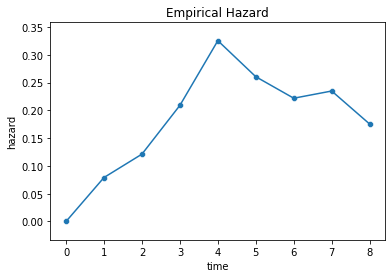

In [11]:
sns.scatterplot(data=df,x='time',y='hazard')
sns.lineplot(data=df,x='time',y='hazard')
plt.title("Empirical Hazard")
plt.show()